# Aritmética fuzzy
  * Numeros Fuzzy
  * Computação com Números Fuzzy
  * Artimética intervalar e alfa-cuts
    * soma, subtração, multiplicação, divisão
  * Princípio da extensão
    
## Atividade
   * Programe todas as operações aritméticas dos conjuntos $A$ e $B$ e plote os gráficos.

## Passos
   * Defino o valor do **alphacut** que deseho fazer as operações aritméticas.
      * 1.1 **alphacut** = 0.5
   * Encontro o valor de $x$ para **alphacut** determinado sobre os conjuntos $A$ e $B$.
   * calculo as operações aritmeticas 


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

## Definição dos meus Conjuntos $A$ e $B$.
    
Os conjuntos criados estão intersectidos

In [2]:
A = np.array([[1,0], [2,0.2], [3,0.4], [4,0.6], [5,0.8], [6,1], [7,0.8], [8,0.6],[9,0.4],[10,0.2], [11,0]], dtype=np.float32) # (11, 2)
B = np.array([[5,0], [6,0.2], [7,0.4], [8,0.6], [9,0.8], [10,1], [11,0.8], [12,0.6], [13,0.4], [14,0.2], [15,0]], dtype=np.float32)

In [12]:
def plot_sets(conjuntos, labels, title=None, position=None):
    """
     - função para plotagem dos conjuntos 2d
     -- plota os conjuntos em um mesmo plano
    """
    
    color = ['--bo','--go', '--ro', '--yo', '--po']
    facecolors = [cm.jet(x) for x in np.random.rand(20)]
    
    fig, ax = plt.subplots()

    indice = 0
    for i in conjuntos:
            plt.plot(i[:,0], i[:,1], color[indice], label=labels[indice])
            plt.fill_between(i[:,0], i[:,1], facecolors=facecolors[indice], alpha=0.4)
            indice += 1 
            
    if position:
        legend = ax.legend(loc=position, shadow=True, fontsize='x-large')
    else:
        legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')

    # Put a nicer background color on the legend.
    legend.get_frame().set_facecolor('#00FFCC')
    plt.title(title)
    plt.grid(True)

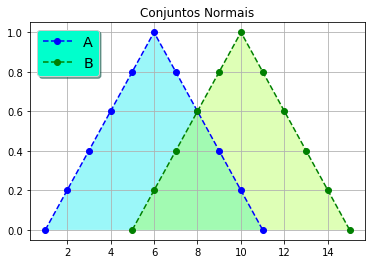

In [13]:
conjuntos = np.array([A,B])
plot_sets(conjuntos, ['A', 'B'], 'Conjuntos Normais')

Função para calcular o **AlphaCut**.

In [15]:
def get_coord_alpha_cut(a,b,m,pert):
    """
    return new a' and b' do alphacut
    """
    new_a_row = (pert * (m-a))+a
    new_b_row = ((pert * (b-m))-b) * -1
    
    return new_a_row, m, new_b_row

In [38]:
alpha_cut = 0.5

a_a,a_m, a_b = get_coord_alpha_cut(a=A[0],b=A[len(A)-1],m=A[int((len(A)-1)/2)], pert=alpha_cut)

b_a,b_m, b_b = get_coord_alpha_cut(a=B[0],b=B[len(B)-1],m=B[int((len(B)-1)/2)], pert=alpha_cut)

region_alpha_cut_a = np.array([a_a,a_m,a_b,a_a], dtype=np.float32)

region_alpha_cut_b = np.array([b_a,b_m,b_b,b_a], dtype=np.float32)

print('alphacut of A >\n', region_alpha_cut_a[0:len(region_alpha_cut_a)-1])
print('alphacut of B >\n', region_alpha_cut_b)

alphacut of A >
 [[ 3.5  0.5]
 [ 6.   1. ]
 [ 8.5  0.5]]
alphacut of B >
 [[  7.5   0.5]
 [ 10.    1. ]
 [ 12.5   0.5]
 [  7.5   0.5]]


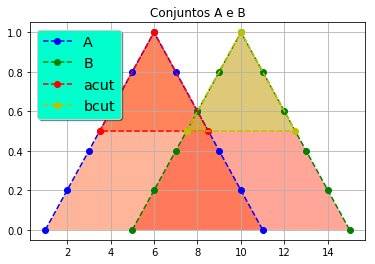

In [28]:
# cojunto dos cojuntos
conjuntos = np.array([A,B,region_alpha_cut_a,region_alpha_cut_b])

# plot sets
plot_sets(conjuntos, ['A','B','acut','bcut'], 'Conjuntos A e B')

# Operações 
## Soma :
  * [a,b] + [c,d] = [a+c, b+d]


In [41]:
def intervalo_soma(a,b):
    """
    soma [1:soma de a+b, m, soma de b+c]
    """
    value_min = (a[0,0] + b[0,0]) 
    value_max = (a[len(a)-1,0]  + b[len(b)-1,0])
    m = (value_min + value_max) / 2
    
    soma = np.array([ [value_min, min(a[0,1],b[0,1])],
                       [m, 1],
                      [value_max, min(a[len(a)-1,1], b[len(b)-1,1])],
                     [value_min, min(a[0,1],b[0,1])],
                    ], dtype=np.float32)
    return soma

In [42]:
# calcule sets sum alpha cut of a and b
conjunto_soma = intervalo_soma(np.copy(region_alpha_cut_a[0:len(region_alpha_cut_a)-1]),
                               np.copy(region_alpha_cut_b[0:len(region_alpha_cut_b)-1]))
conjunto_soma

array([[ 11. ,   0.5],
       [ 16. ,   1. ],
       [ 21. ,   0.5],
       [ 11. ,   0.5]], dtype=float32)

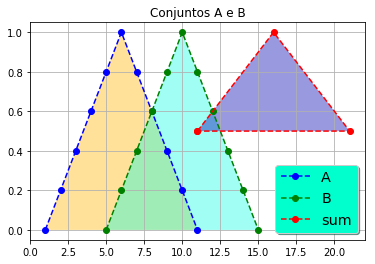

In [47]:
# cojunto dos cojuntos
conjuntos = np.array([A,B,conjunto_soma])

# plot sets
plot_sets(conjuntos, ['A','B', 'sum'], 'Conjuntos A e B', 'lower right' )

### Subtração :  
  * [a,b] - [c,d] = [a-d, b-c]

In [61]:
def intervalo_subtracion(a,b):
    """
    subtracion [1:subtracion de a+b, m, subtracion de b+c]
    a = a[0,0]
    b = a[len(a)-1,0]
    c = b[0,0]
    d = b[len(b)-1,0]
    """
    value_min = abs(a[0,0] - b[len(b)-1,0]) 
    value_max = abs(b[0,0] - a[len(a)-1,0])
    m = abs(value_min + value_max) / 2
    
    subtracion = np.array([ [value_min, min(a[0,1],b[0,1])],
                            [m, 1],
                            [value_max, min(a[len(a)-1,1], b[len(b)-1,1])],
                            [value_min, min(a[0,1],b[0,1])],
                          ],dtype=np.float32)
    return subtracion

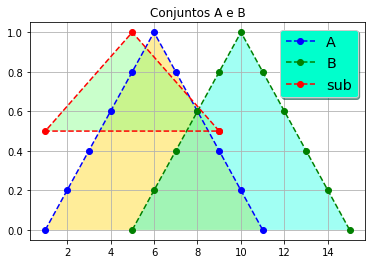

In [62]:
intervalo_subtracion =  intervalo_subtracion(np.copy(region_alpha_cut_a[0:len(region_alpha_cut_a)-1]),
                                             np.copy(region_alpha_cut_b[0:len(region_alpha_cut_b)-1]))

# cojunto dos cojuntos
conjuntos = np.array([A,B,intervalo_subtracion])

# plot sets
plot_sets(conjuntos, ['A','B', 'sub'], 'Conjuntos A e B', 'upper right' )

### Multiplicação
 * [a,b] x [c,d] = [min((axc),(axd),(bxc),(bxd)), max((axc),(axd),(bxc),(bxd))]

In [63]:
def intervalo_multiplication(a,b):
    """
    a = a[0,0]
    b = a[len(a)-1,0]
    c = b[0,0]
    d = b[len(b)-1,0]
    """
    
    value_min = min((a[0,0]*b[0,0]), (a[0,0]*b[len(b)-1,0]), (a[len(a)-1,0]*b[0,0]), (a[len(a)-1,0]*b[len(b)-1,0])) 
    value_max = max((a[0,0]*b[0,0]), (a[0,0]*b[len(b)-1,0]), (a[len(a)-1,0]*b[0,0]), (a[len(a)-1,0]*b[len(b)-1,0])) 
    m = abs(value_min + value_max) / 2
    
    mul = np.array([ [value_min, min(a[0,1],b[0,1])],
                     [m, 1],
                     [value_max, min(a[len(a)-1,1], b[len(b)-1,1])],
                     [value_min, min(a[0,1],b[0,1])]
                   ], dtype=np.float32)
    return mul

In [66]:
intervalo_mul =  intervalo_multiplication(np.copy(region_alpha_cut_a[0:len(region_alpha_cut_a)-1]),
                                             np.copy(region_alpha_cut_b[0:len(region_alpha_cut_b)-1]))
intervalo_mul

array([[  26.25,    0.5 ],
       [  66.25,    1.  ],
       [ 106.25,    0.5 ],
       [  26.25,    0.5 ]], dtype=float32)

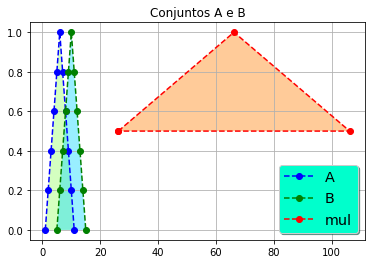

In [68]:
# cojunto dos cojuntos
conjuntos = np.array([A,B,intervalo_mul])

# plot sets
plot_sets(conjuntos, ['A','B', 'mul'], 'Conjuntos A e B', 'lower right' )

### Divisão
 * [a,b] x [c,d] = [min((a/c),(a/d),(b/c),(b/d)), max((a/c),(a/d),(b/c),(b/d))]

In [69]:
def intervalo_divisao(a,b):
    """
    a = a[0,0]
    b = a[len(a)-1,0]
    c = b[0,0]
    d = b[len(b)-1,0]
    """
    
    value_min = min((a[0,0]/b[0,0]), (a[0,0]/b[len(b)-1,0]), (a[len(a)-1,0]/b[0,0]), (a[len(a)-1,0]/b[len(b)-1,0])) 
    value_max = max((a[0,0]/b[0,0]), (a[0,0]/b[len(b)-1,0]), (a[len(a)-1,0]/b[0,0]), (a[len(a)-1,0]/b[len(b)-1,0])) 
    m = abs(value_min + value_max) / 2
    
    div = np.array([ [value_min, min(a[0,1],b[0,1])],
                     [m, 1],
                     [value_max, min(a[len(a)-1,1], b[len(b)-1,1])],
                     [value_min, min(a[0,1],b[0,1])]
                   ], dtype=np.float32)
    return div

In [71]:
intervalo_div =  intervalo_divisao(np.copy(region_alpha_cut_a[0:len(region_alpha_cut_a)-1]),
                                   np.copy(region_alpha_cut_b[0:len(region_alpha_cut_b)-1]))
intervalo_div

array([[ 0.28      ,  0.5       ],
       [ 0.70666665,  1.        ],
       [ 1.13333333,  0.5       ],
       [ 0.28      ,  0.5       ]], dtype=float32)

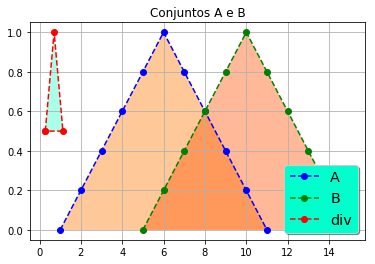

In [72]:
# cojunto dos cojuntos
conjuntos = np.array([A,B,intervalo_div])

# plot sets
plot_sets(conjuntos, ['A','B', 'div'], 'Conjuntos A e B', 'lower right' )

# Referências
 * [Plotting categorical variables](https://matplotlib.org/gallery/lines_bars_and_markers/categorical_variables.html#sphx-glr-gallery-lines-bars-and-markers-categorical-variables-py)